# Face recognition using k-Nearest Neighbor

---

### Contents
<ol>
    <li><a href="#data-preprocessing" style="color: currentColor">Data preprocessing</a></li>
    <li><a href="#pca" style="color: currentColor">Principal Component Analysis</a></li>
    <li><a href="#knn" style="color: currentColor">k-Nearest-Neighbor</a></li>
    <li><a href="#testing" style="color: currentColor">Model testing</a></li>
    <li><a href="#accuracy" style="color: currentColor">Accuracy evaluation</a></li>
    <li><a href="#further-analysis" style="color: currentColor">Further Analysis</a></li>
</ol>
<br>

<i> Note: To keep the notebook readable, it focuses on executing the code and showing the results. The entire code can be found in the functions folder and the beloging .py files.</i>

---

### Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd


# os.chdir(r"C:\Users\fedbe\OneDrive\Dokumente\GitHub\topic01_team01")
# checks if the current working directory is correct:
# print(os.getcwd())

---

## <a id="data-preprocessing"></a> 1. Data preprocessing 

(INSERT SOURCES?) (INCLUDE MORE INFO; e.g. FORMULAS TO DESCRIBE ALL STEPS BETTER?)

In the first part, we need to perform different preprocessing steps before we can move on to Principal component analysis (PCA).\
First, we transform each image into a 1D vector to create a 2D data matrix where each row is a single sample (image) and each column corrresponds to one feature (pixel). This procedure is called <b> flattening</b>.\
Secondly, we <b> convert the integer formats to floating point</b> so that arithmetic operations behave correctly and <b> normalize </b> the data to the range [0,1] to ensure that each pixel has a similar scale.\
Before performing further preprocessing steps, we split the dataset into training and test data. The dataset contains 11 images expressing different facial expression and light conditions of 15 subjects each. In order to split these images, 8 images of each subject are choosen randomly to use for training. All remaining images will serve as test data.
Next, we <b> center our data </b> . This is done, by subtracting the mean value for each pixel position across the dataset. This ensures that your dataset has a zero mean, which is essential because PCA will then capture the directions of maximum variance around this mean.\
Lastly, we <b> standardize</b>  the data by subtracting the mean and then dividing by the standard deviation for each feature (also called <b> z-transformation</b>).

In [2]:
from functions.preprocessing import preprocessing

final_train, final_test, train_labels, test_labels, test_arr = preprocessing()

Total training images: 120
Total testing images: 45

Verification of preprocessing:
First training image: Mean ≈ 0.4097, Std ≈ 0.5783


---

## <a id="pca"></a> 2. Pricinpal component analysis

In [3]:
from functions.pca import svd_pca
from functions.pca import pca_transform

n_components = 40  # Number of components to keep, can be adjusted later
# semicolon is used to suppress output of the last line in Jupyter notebooks, so in our case it prevents the return output
projection_matrix, train_reduced, explained_variance_ratio = svd_pca(final_train,n_components)
test_reduced = pca_transform(final_test,projection_matrix)
# Maybe already implement here some Plots, to show which PC are the most important ones
# and what number of n_components is the best to use for our model instead of doing everything in 5.?
# 

Succesfully reduced Matrix from (120, 77760) to (120, 40)

Succesfully transformed Matrix from (45, 77760) to (45, 40)


---

## <a id="knn"></a> 3. k-Nearest-Neighbor

k-NN Classification Accuracy: 95.56%


C:\Users\fedbe\AppData\Local\Temp\ipykernel_20188\2989858776.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


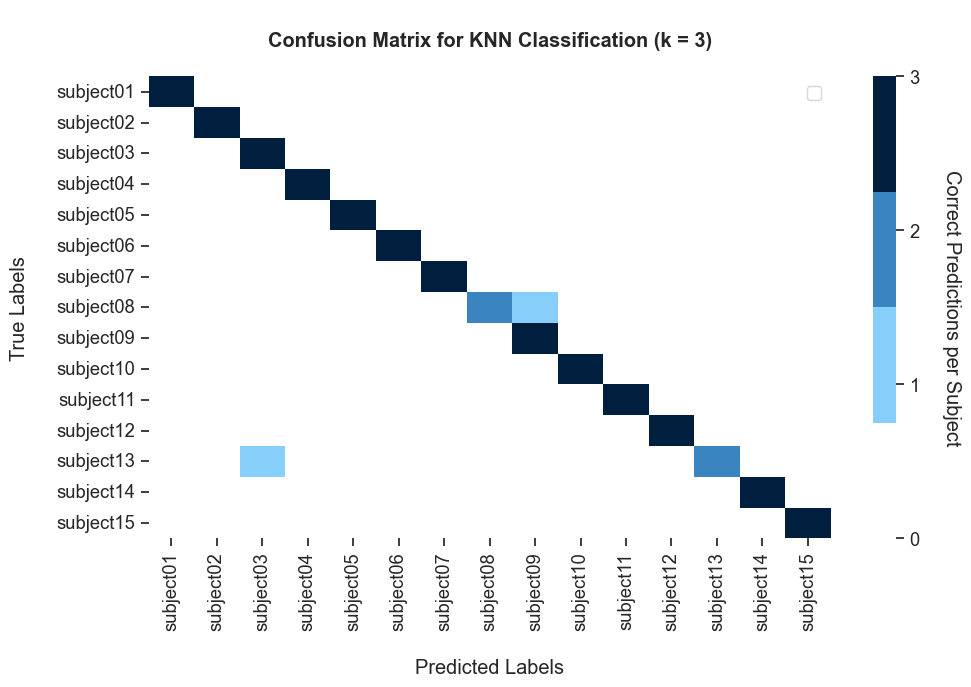

In [22]:
from functions.knn import knn_classifier

k = 3 # Number of neighbors to consider
predictions = knn_classifier(train_reduced, train_labels, test_reduced, test_labels, k)

# Convert them to NumPy arrays if they aren’t already:
true_labels = np.array(test_labels)
pred_labels = np.array(predictions)

# Compute the confusion matrix. It will have shape (n_classes, n_classes)
cm = confusion_matrix(true_labels, pred_labels)

#Determine unique class labels for better tick labeling
classes_labels = np.unique(np.concatenate((true_labels, pred_labels)))

# Define a custom palette with soft blue tones
custom_palette = sns.color_palette(["#ffffff", "#87CEFA", "#3A84C0", "#001f3f"], as_cmap=True)

plt.figure(figsize=(11, 6))
heatmap = sns.heatmap(cm, cmap=custom_palette, xticklabels=classes_labels, yticklabels=classes_labels)

# Customize the colorbar annotations
cbar = heatmap.collections[0].colorbar
# Set specific tick positions
cbar.set_ticks([0, 1, 2, 3]) 
# Labelpad is used to adjust the distance of the label from the colorbar
cbar.set_label("Correct Predictions per Subject", rotation=270, labelpad=30)

plt.xlabel('\nPredicted Labels')
plt.ylabel('True Labels\n')
plt.title(label=f"\nConfusion Matrix for KNN Classification (k = {k})\n", fontweight='bold')
plt.legend()

---

## <a id="testing"></a> 4. Model testing

In [5]:
img_check = Image.open("datasets/subject01.glasses.gif")
print(f"Size: {img_check.size}")

Size: (320, 243)


In [6]:
# first we rescale the image to the original size of the training images
image_height = 243
image_width = 320
original_shape_test_images = test_arr.reshape(-1, image_height, image_width)
print(f"final_test shape: {test_arr.shape}")
print(f"test_images original shape: {original_shape_test_images.shape}")

final_test shape: (45, 77760)
test_images original shape: (45, 243, 320)


---

## <a id="accuracy"></a> 5. Accuracy evaluation

In section 5 we perform some evaluations in order to optimize our output. As we ran our model before for demonstration, we already used the best parameters based on the evaluations below. Therefore, this section will show why the chosen parameters are the best for our Image analysis model.

### 5.1  How to split the dataset?

The results depend on the way you choose to split the dataset. If you use not enough images for testing, the model might not recongnize unseen images correctly. TEXT ERWEITERN
Therefore, we evaluated what kind of splitting is the most efficient one: 


durchlaufen lassen für accuracy gegen anzahl der train images als plot => scatter plot oder boxplot

### 5.2 Finding perfect amount of principal components

After evaluating the dataset splitting, we now want to find out which amount of pricipal components (PC) is the one with the highest accuracy and fast data processing. We defined a threshold of ... % to be the perfect variance. Therefore we choose .... PCs. The curve shows a horizontal asymptotic behavior. It increases exponentially in the beginning. As the number of components increases, the cumulative explained variance ratio continues to grow, but at a slower rate.

Succesfully reduced Matrix from (120, 77760) to (120, 100)



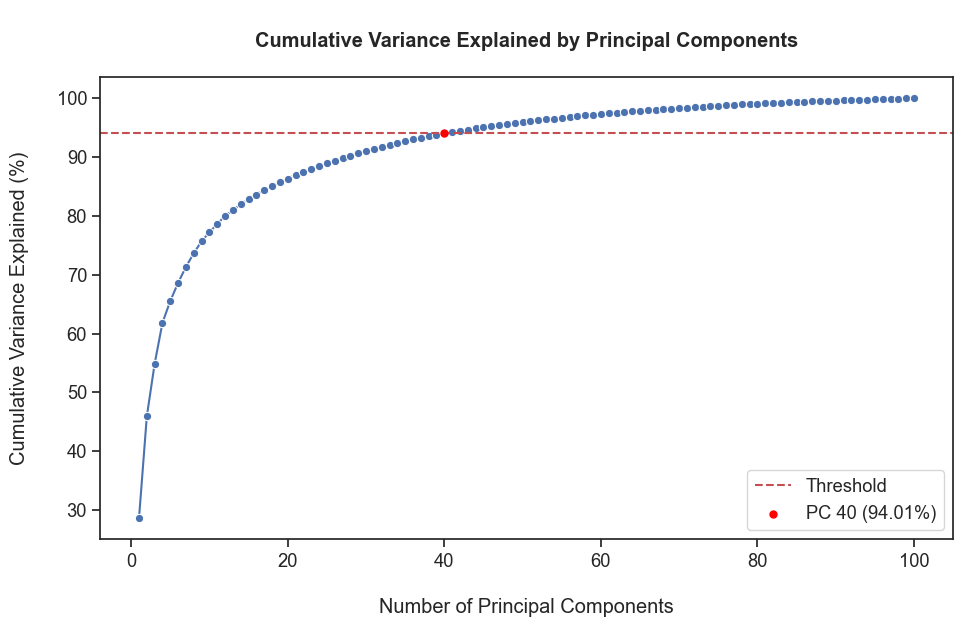

In [7]:
projection_matrix_for_plot, train_reduced_for_plot, explained_variance_ratio_for_plot = svd_pca(final_train,100)

n_pcs_for_plot = np.arange(1, 101)  # Range of components from 1 to 100

# times 100 to convert to percentage
cumulative_variance = np.cumsum(explained_variance_ratio_for_plot*100)

# We subtract 1 from n_components because python uses 0-based indexing
highlight_n_plot_y = cumulative_variance[n_components-1]

sns.set_theme(style="ticks", font_scale=1.2)
plt.figure(figsize=(11, 6))
sns.lineplot(x=n_pcs_for_plot, y=cumulative_variance, marker='o')

plt.xlabel("\nNumber of Principal Components")
plt.ylabel("Cumulative Variance Explained (%)\n")
plt.title(label="\nCumulative Variance Explained by Principal Components\n", fontweight='bold')
plt.axhline(y=highlight_n_plot_y, color='r', linestyle='--', label="Threshold")
plt.scatter(n_components, highlight_n_plot_y, color="red", s=25, zorder=2, label=f"PC {n_components} ({highlight_n_plot_y:.2f}%)")
plt.legend()

### 5.3 Finding the best k

In the following section we focused on evaluating, which amount of nearest neighbors k leads to the highest accuracy

Evaluation of best k for:
120 training images and 45 test images and 40 principal components

Best k = 3 with accuracy: 95.56%


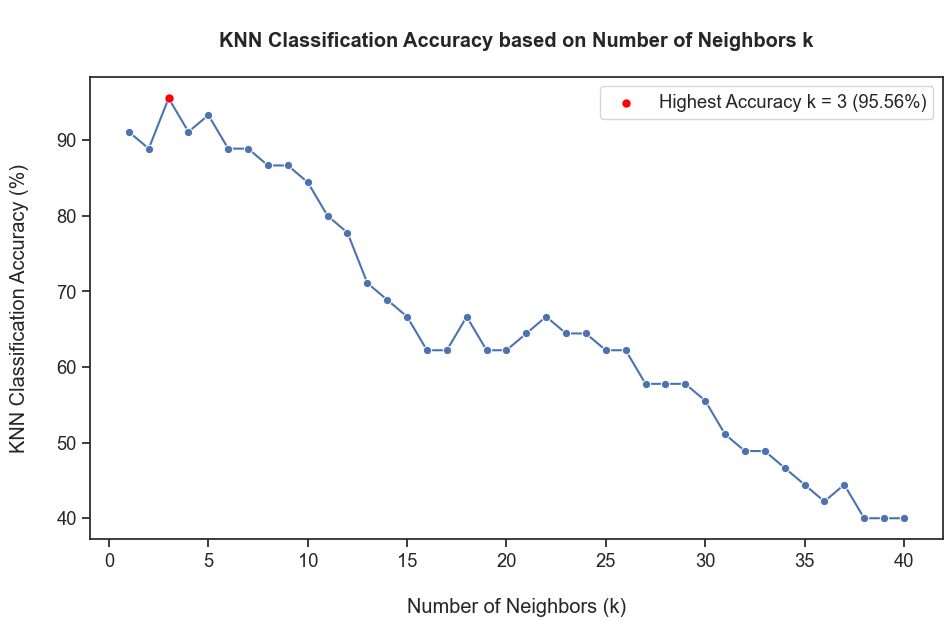

In [8]:
# Dictionary to store accuracies for each k value.
accuracy_dict = {}

#\033[1m stands for bold;\033[3m stands for italic \033[0m resets the formatting to normal.
print(f"Evaluation of best \033[3m\033[1mk\033[0m for:")
print(f"\033[3m\033[1m{len(train_reduced)}\033[0m training images and \033[3m\033[1m{len(test_reduced)}\033[0m test images and \033[3m\033[1m{n_components}\033[0m principal components")

# loop through k values from 1 to 40, as k = 1 is not considered a good choice for KNN.
for k in range(1, 41):
    predicted_labels = knn_classifier(train_reduced, train_labels, test_reduced, test_labels, k, verbose=False)
    accuracy = np.mean(np.array(predicted_labels) == np.array(test_labels))
    # assigns the value of accuracy to the key k in the dictionary accuracy_dict.
    # This means for each value of k (the number of neighbors in KNN), you store the corresponding classification accuracy.
    accuracy_dict[k] = accuracy
    #print(f"k = {k}: Classification Accuracy = {accuracy * 100:.2f}%")	

# Identify the best k value based on the highest accuracy
best_k = max(accuracy_dict, key=accuracy_dict.get)
highest_accuracy = accuracy_dict[best_k]*100
print(f"\nBest k = {best_k} with accuracy: \033[1m{highest_accuracy:.2f}%\033[0m")

# First, sort the dictionary keys (k values) for plotting in order.
k_values = sorted(accuracy_dict.keys())
k_accuracy_values = [accuracy_dict[k]*100 for k in k_values]


sns.set_theme(style="ticks", font_scale=1.2)
plt.figure(figsize=(11, 6))
sns.lineplot(x=k_values, y=k_accuracy_values, marker='o')

plt.xlabel("\nNumber of Neighbors (k)")
plt.ylabel("KNN Classification Accuracy (%)\n")
plt.title(label="\nKNN Classification Accuracy based on Number of Neighbors k\n", fontweight='bold')
plt.scatter(best_k, highest_accuracy, color="red", s=25, zorder=2, label=f"Highest Accuracy k = {best_k} ({highest_accuracy:.2f}%)")
plt.legend()

---

## <a id="further-analysis"></a> 6. Further analysis

In [9]:
# for MacOS users, the path separator is a forward slash, please uncomment the following line:
# %run functions/furtheranalysis.py

%run functions\furtheranalysis.py

SyntaxError: unterminated string literal (detected at line 4) (furtheranalysis.py, line 4)